In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns
import nltk 
from nltk import RegexpTokenizer as rpt
from nltk.corpus import stopwords as sw
from string import punctuation 

nltk.download('punkt')
nltk.download('stopwords')

#regex para pegar apenas palavras não pontuadas
separador = rpt(r'\w+')
stopwords = sw.words('portuguese')

data_url="https://raw.githubusercontent.com/liraop/recinfo_lab2/master/data/results.csv"
dados = pd.read_csv(data_url).replace(np.nan, '', regex=True)
n_documentos = dados.text.count()
palavras = []
bigramas = []

for artigo in dados.text:
    tokens = []
    for token in separador.tokenize(artigo.lower()):
        #se não é stopword e não é bigrama...
        if token not in stopwords and len(token) > 3 and not bool(re.search(r'\d', token)):
             tokens.append(token)
    palavras.extend(tokens)
    bigramas.extend(list(nltk.bigrams(tokens)))


df = pd.DataFrame(palavras, columns=['palavra'])
conta_palavras = df.palavra.value_counts().reset_index()
conta_palavras.columns = ['palavra', 'frequencia']
conta_palavras['r'] = conta_palavras.frequencia.rank(ascending=False, method='first')

acima_1000 = len(conta_palavras[conta_palavras.frequencia > 1000])
singulares = len(conta_palavras[conta_palavras.frequencia == 1])
total_itens = len(palavras)
vocabulario = len(set(palavras))

[nltk_data] Downloading package punkt to /Users/liraop/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/liraop/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 1. Reproduza a tabela 4.1 do livro texto calculando as estatísticas para sua coleção

In [3]:
tabela = pd.DataFrame(data={"index": [  
             'Total documents', 
             'Total word occurences',
             'Vocabulary size',
             'Words occuring > 1000 times',
             'Words occuring once'
          ], "results": [
           n_documentos,
           total_itens,
           vocabulario,
           acima_1000,
           singulares
         ]})

tabela

,index,results
0,Total documents,249
1,Total word occurences,111362
2,Vocabulary size,21802
3,Words occuring > 1000 times,0
4,Words occuring once,10794


### 2. Reproduza a tabela 4.2 do livro considerando as top-50 palavras mais frequentes de sua coleção

In [5]:
conta_palavras["PR"] = round((conta_palavras.frequencia / total_itens) * 100, 2)
conta_palavras["r.PR"] = round(conta_palavras.r * conta_palavras["PR"] / 100, 3)
conta_palavras[:50]

,palavra,frequencia,r,PR,r.PR
0,anos,585,1.0,0.53,0.005
1,sobre,426,2.0,0.38,0.008
2,presidente,416,3.0,0.37,0.011
3,bolsonaro,376,4.0,0.34,0.014
4,governo,352,5.0,0.32,0.016
5,país,339,6.0,0.30,0.018
6,ainda,337,7.0,0.30,0.021
7,brasil,333,8.0,0.30,0.024
8,contra,244,9.0,0.22,0.020
9,porque,242,10.0,0.22,0.022


### 3. Plote curvas de rank-frequência (usando escala logarítmica) para palavras e bigramas na coleção que você coletou na atividade anterior. Quais os melhores valores do parâmetro c para cada curva
#### Palavras

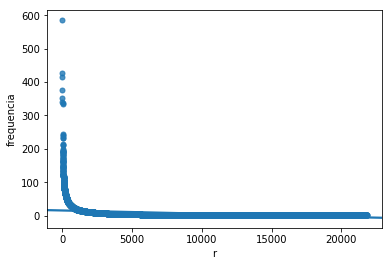

In [7]:
function, axis = plt.subplots()
sns.regplot("r", "frequencia", conta_palavras, ax=axis, marker=".", scatter_kws={"s": 100})

#### Bigramas:

### 4. Reproduza a tabela 4.5 do livro texto considerando a sua coleção

In [10]:
ocorrencias = range(1, 11)
previsao = [round(1 / (o * (o + 1)), 3) for o in ocorrencias]
proporcao = [round(len(conta_palavras[conta_palavras.frequencia == i]) / vocabulario, 3) for i in ocorrencias]
numero_real = [int(len(conta_palavras[conta_palavras.frequencia == i])) for i in ocorrencias]

tabela2 = pd.DataFrame(data=np.transpose([
    ocorrencias,
    previsao,
    proporcao,
    numero_real
]), columns=[
    "Número de ocorrências (n)", 
    "Proporção prevista (1/n(n+1))",
    "Proporção atual", 
    "Numero real de palavras"
])
tabela2

,Número de ocorrências (n),Proporção prevista (1/n(n+1)),Proporção atual,Numero real de palavras
0,1.0,0.500,0.495,10794.0
1,2.0,0.167,0.166,3627.0
2,3.0,0.083,0.081,1762.0
3,4.0,0.050,0.051,1107.0
4,5.0,0.033,0.035,771.0
5,6.0,0.024,0.023,511.0
6,7.0,0.018,0.018,392.0
7,8.0,0.014,0.015,325.0
8,9.0,0.011,0.012,270.0
9,10.0,0.009,0.011,244.0
